# TripAdvisor Reviews Sentiment Analysis

A dataset containing reviews for the Hotel review site TripAdvisor was taken and a sentiment analysis was performed on the set of selected reviews. Following are the results and the steps taken to perform the sentiment analysis.

Importing the NLP libraries spaCy and NLTK.

spaCy is a free open-source library for Natural Language Processing in Python. It features NER, POS tagging, dependency parsing, word vectors and more.

NLTK is a leading platform for building Python programs to work with human language data. Written by the creators of NLTK, it guides the reader through the fundamentals of writing Python programs, working with corpora, categorizing text, analyzing linguistic structure, and more.

Here we also import a list of stopwords as a reference for identifying the stopwords in our project.

In [1]:
import spacy
from textblob import TextBlob
import pandas as pd
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Neverland\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Importing the dataset and storing it in a pandas dataframe.

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
df=pd.read_csv("TripAdvisorReviews.csv")

A preview of the dataset.

In [4]:
df.head()

,ID,Hotelcode,review_content,id
0,125456,79,Really good staff and caring look after everyt...,7684053
1,26177,85,"A simple and humble hotel, yet 1000 Miles Hote...",8279441
2,124330,85,Great location - walking distance to most plac...,7685864
3,134781,85,We spent 3 nights in this hotel. I had booked ...,7555219
4,246206,85,My expectations was quite high being this host...,7235691


Using the lambda function of Python and the TextBlob library, we calculate the sentiment scores for all the reviews in the data set.

TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [5]:
df['sentiment'] = df['review_content'].apply(lambda x: TextBlob(x).sentiment[0])

We assign a recommendation tag based on the sentiment score for the reviews in our dataset.

In [6]:
recom=[]
for i in df['sentiment']:    
    if(i>0.5):
        recom.append('strongly recommend')
    elif(0<i<0.5):
        recom.append('recommend')
    elif(-0.5<i<0):
        recom.append('negative')
    else:
        recom.append('strongly negative')

In [7]:
df['recommendation']=recom

In [8]:
df.head(20)

,ID,Hotelcode,review_content,id,sentiment,recommendation
0,125456,79,Really good staff and caring look after everyt...,7684053,0.484000,recommend
1,26177,85,"A simple and humble hotel, yet 1000 Miles Hote...",8279441,0.246742,recommend
2,124330,85,Great location - walking distance to most plac...,7685864,0.424792,recommend
3,134781,85,We spent 3 nights in this hotel. I had booked ...,7555219,0.173958,recommend
4,246206,85,My expectations was quite high being this host...,7235691,-0.019028,negative
5,258894,85,The owner and her staff is very kind and helpf...,7232648,0.280000,recommend
6,32211,172,Cosy boutique hotel with outstanding service a...,8261226,0.554688,strongly recommend
7,60409,172,We stayed for 2 nights in this wonderful prope...,7683894,0.650000,strongly recommend
8,138121,172,A very quiet and beautiful bed and breakfast g...,7554225,0.537143,strongly recommend
9,283274,172,What is the definition of perfection? A stay a...,7138168,0.443750,recommend


Here is a plot of the sentiment scores showing the areas where the scores are concentrated. In our example we see a high density of sentiment scores around the 0.5 mark, which implies reviews on the generally positive side are prevelant.

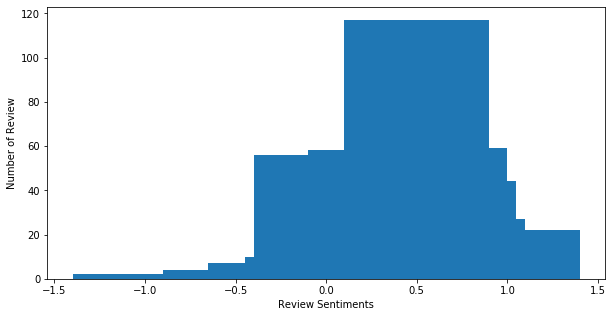

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

Sentiment_count=df.groupby('sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['review_content'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

We have collected 21056 reviews for the analysis.

In [10]:
df1=df['review_content']

In [11]:
df1.shape

(21056,)

Here we provide an in depth look at the sentiment intensity using the VADER Sentiment Analyser.

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
analyser = SentimentIntensityAnalyzer()

In [13]:
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

def sentiment_analyzer_scores(sentence):
    
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    print("Overall sentiment dictionary is : ", sentiment_dict) 
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    print("Sentence Overall Rated As", end = " ") 
  
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        print("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        print("Negative") 
  
    else : 
        print("Neutral") 

Here we analyse each review by identifying the positive, neutral and negative words and then by totaling the sentiment scores for the sentences. Hence we get an understanding of the nature of the sentence in regards to what % of it was positive, neutral and negative. We get an overall rating for the sentence as well as a breakdown of the various sentiments in percentages.

In [15]:
print(sentiment_analyzer_scores(df['review_content'][1]))

Overall sentiment dictionary is :  {'neg': 0.049, 'neu': 0.71, 'pos': 0.242, 'compound': 0.9916}
sentence was rated as  4.9 % Negative
sentence was rated as  71.0 % Neutral
sentence was rated as  24.2 % Positive
Sentence Overall Rated As Positive
None


A more thorough breakdown of the sentences gives us a list of positive, neutral and negative words in each review. We do so by tokenizing the words and ignoring the stop words in a sentence. Then using VADER we find out the list of positive, neutral and negative words in the sentence.

In [18]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
stop_words = set(stopwords.words('english')) 

all_pos_words = []
all_neu_words = []
all_neg_words = []


word_tokens = word_tokenize(df['review_content'][1]) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  
sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]
for word in filtered_sentence:
    if (sid.polarity_scores(word)['compound']) >= 0.5:
        pos_word_list.append(word)
        all_pos_words.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.5:
        neg_word_list.append(word)
        all_neg_words.append(word)
    else:
        neu_word_list.append(word)
        all_neu_words.append(word)
    
print('Positive :',pos_word_list)        
print('Neutral :',neu_word_list)    
print('Negative :',neg_word_list)    

Positive : ['happily', 'best']
Neutral : ['A', 'simple', 'humble', 'hotel', ',', 'yet', '1000', 'Miles', 'Hotel', 'beyond', 'expectations', 'cheap', 'price', '.', 'The', 'hotel', 'clean', ',', 'provide', 'us', 'simple', 'nice', 'breakfast', 'every', 'morning', ',', 'interior', 'design', 'nice', 'take', 'nice', 'picture', 'around', '1st', 'floor', 'room', ',', 'also', 'rooftop', 'see', 'surrounding', 'area', 'clearly', '.', ',', 'staffs', 'nice', 'friendly', ',', 'even', 'though', "'re", 'shy', 'greet', 'us', 'every', 'time', 'helped', 'us', 'need', '.', 'The', 'hotel', 'surrounded', 'lot', 'convenience', 'stores', 'restaurants', 'easy', 'us', 'grab', 'quick', 'meal', '.', 'We', 'need', 'walk', '3', 'minutes', 'nearest', 'Masjid', 'Jamek', 'LRT', 'station', '.', 'The', 'downside', 'personal', 'preference', 'alley', 'around', 'hotel', 'pretty', 'scary', 'night', '2', 'girls', 'walk', '.', 'Nevertheless', ',', 'budget', 'hotel', 'I', 'ever', '!']
Negative : []


Punkt Sentence Tokenizer. This tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.

In [44]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Neverland\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
word_tokens = nltk.word_tokenize(df["review_content"][0])
word_tokens

['Really',
 'good',
 'staff',
 'and',
 'caring',
 'look',
 'after',
 'everything',
 'u',
 'need',
 'and',
 'putri',
 'spa',
 'therapist',
 'relaxing',
 'and',
 'in',
 'front',
 'office',
 'krisna',
 'he',
 'really',
 'helpfull',
 'they',
 'make',
 'us',
 'cook',
 'in',
 'their',
 'kitchen',
 'aswell',
 'we',
 'really',
 'happy',
 'to',
 'stay',
 'there',
 'really',
 'recommend',
 'very',
 'cheap',
 'price',
 'aswell']

Word densities - A frequency distribution to find out the density of positive, neutral and negative words in the reviews.

In [19]:
from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(10))

[('great', 7548), ('best', 3412), ('amazing', 3362), ('excellent', 2995), ('comfortable', 2993), ('beautiful', 2722), ('lovely', 2006), ('enjoyed', 1883), ('wonderful', 1873), ('perfect', 1745)]


The top 5 most commonly used positive words in the customers' reviews.

In [26]:
pos_words_ncw = pd.DataFrame(freq_dist_pos.most_common(10),columns=['words', 'count'])
pos_words_ncw.head(5)

,words,count
0,great,7548
1,best,3412
2,amazing,3362
3,excellent,2995
4,comfortable,2993


A frequency distribution plot showing the top 10 most commonly used positive words in the customers' reviews. 

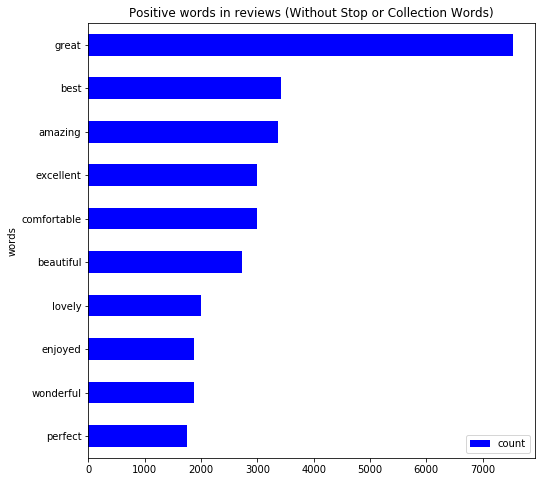

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))

pos_words_ncw.sort_values(by='count').plot.barh(x='words', y='count',ax=ax, color="blue")

ax.set_title("Positive words in reviews (Without Stop or Collection Words)")

plt.show()

In [32]:
freq_dist_neg = FreqDist(all_neg_words)
print(freq_dist_neg.most_common(10))

[('bad', 718), ('worst', 202), ('negative', 199), ('horrible', 101), ('disappointment', 99), ('sick', 56), ('pathetic', 54), ('die', 54), ('disgusting', 48), ('unprofessional', 44)]


The top 5 most commonly used negative words in the customers' reviews.

In [33]:
neg_words_ncw = pd.DataFrame(freq_dist_neg.most_common(10),columns=['words', 'count'])
neg_words_ncw.head(5)

,words,count
0,bad,718
1,worst,202
2,negative,199
3,horrible,101
4,disappointment,99


A frequency distribution plot showing the top 10 most commonly used negative words in the customers' reviews.

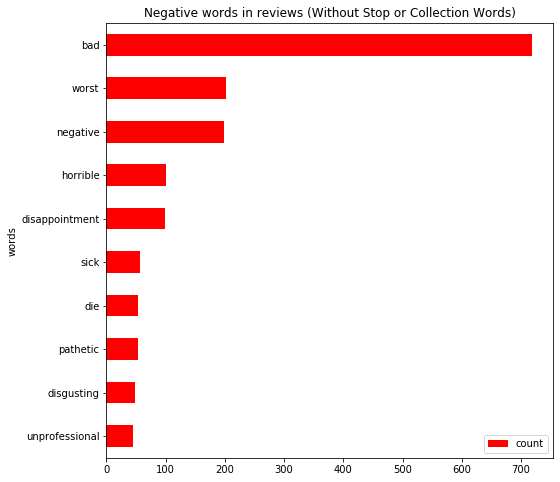

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))

neg_words_ncw.sort_values(by='count').plot.barh(x='words', y='count',ax=ax, color="red")

ax.set_title("Negative words in reviews (Without Stop or Collection Words)")

plt.show()

## Model building

Here we try fitting a Logistic Regression model to the data to find out how it performs.

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [60]:
sentiment_statements=[]
for i in df['sentiment']:    
    if(i>0):
        sentiment_statements.append('positive')
    else:
        sentiment_statements.append('negative')
        
df['sentiment_1']=sentiment_statements

Classifying the sentiment scores as positive and negative only to simplify our model. 

In [68]:
del df['wordtokens']
df.head()

,ID,Hotelcode,review_content,id,sentiment,recommendation,sentiment_1
0,125456,79,Really good staff and caring look after everyt...,7684053,0.484000,recommend,positive
1,26177,85,"A simple and humble hotel, yet 1000 Miles Hote...",8279441,0.246742,recommend,positive
2,124330,85,Great location - walking distance to most plac...,7685864,0.424792,recommend,positive
3,134781,85,We spent 3 nights in this hotel. I had booked ...,7555219,0.173958,recommend,positive
4,246206,85,My expectations was quite high being this host...,7235691,-0.019028,negative,negative


Splitting the dataset into training and testing datasets. We do a rough 70 - 30 split.

In [70]:
train_reviews=df.review_content[:14700]
train_sentiments=df.sentiment_1[:14700]

test_reviews=df.review_content[14700:]
test_sentiments=df.sentiment_1[14700:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(14700,) (14700,)
(6356,) (6356,)


Tokenizing and de-noising.

Essentially removing noise from words as preprocessing the data to clean it up for further operations.

In [71]:
from nltk.tokenize.toktok import ToktokTokenizer

tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

In [73]:
from bs4 import BeautifulSoup

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

df['review_content']=df['review_content'].apply(denoise_text)

In [74]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

df['review_content']=df['review_content'].apply(remove_special_characters)

Here we do the Stemming process.

Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

In [75]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

df['review_content']=df['review_content'].apply(simple_stemmer)

Removing stop words from the sentences.

In [76]:
stop=set(stopwords.words('english'))
print(stop)

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

df['review_content']=df['review_content'].apply(remove_stopwords)

{'from', 'you', 'what', 'weren', 'most', "doesn't", "won't", 'their', 'few', 'there', 'she', 'do', 'didn', 'hers', 'so', 's', 'just', 'the', 'both', 'off', 'if', "couldn't", 'into', 'wasn', 'all', "you'll", 'mightn', 'why', 'too', 'now', 'needn', 'them', 'as', 'this', 're', 'aren', 'under', 'where', "you'd", 'an', 've', 'for', 'are', "don't", 'haven', 'of', 'ma', 'a', 'wouldn', 'not', "should've", 'myself', 'couldn', 'or', 'yourself', 'who', 'that', 'each', 'isn', 'her', 'but', "needn't", 'once', "you've", 'be', 'he', 'same', 'was', 't', 'don', 'no', 'above', "she's", 'when', 'while', 'after', 'again', 'below', "didn't", 'our', "that'll", 'is', 'other', 'until', 'and', 'hasn', 'my', 'some', 'has', 'to', 'him', 'ain', 'herself', 'm', 'its', "shan't", 'those', 'against', 'me', "wouldn't", 'during', "weren't", 'doesn', 'up', 'does', "you're", 'before', 'out', 'whom', 'than', 'more', 'had', 'been', 'have', 'can', 'shouldn', 'ours', 'd', "mustn't", 'himself', 'these', 'am', 'did', 'having',

In [79]:
norm_train_reviews=df.review_content[:14700]

In [80]:
norm_test_reviews=df.review_content[14700:]
norm_test_reviews[14880]

'hotel room wa veri nice staff wa veri friendli custom servic wa excel special thank emili make us feel welcom take care us dure stay harri bar make us best drink ever selina spa amaz massag spa treatment xhan prepar delici egg us breakfast excel stay hotel'

Building a bag of words using the feature extraction libraries of sklearn.

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

cv_train_reviews=cv.fit_transform(norm_train_reviews)
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (14700, 864913)
BOW_cv_test: (6356, 864913)


In [83]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

tv_train_reviews=tv.fit_transform(norm_train_reviews)

tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (14700, 864913)
Tfidf_test: (6356, 864913)


In [86]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()

sentiment_data=lb.fit_transform(df['sentiment_1'])
print(sentiment_data.shape)

(21056, 1)


In [87]:
train_sentiments=sentiment_data[:14700]
test_sentiments=sentiment_data[14700:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
[[0]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


Fitting the data to a logistic regression model.

In [89]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)

lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Predicting reviews based on the test set.

In [90]:
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)

lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


A measure of accuracy of the model. Here we see that the model has fit very well to the data. 

In [92]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.9562617998741346
lr_tfidf_score : 0.9556324732536187


The precision, recall and f1-scores pertaining to out model.

In [94]:
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       1.00      0.01      0.03       282
    Negative       0.96      1.00      0.98      6074

    accuracy                           0.96      6356
   macro avg       0.98      0.51      0.50      6356
weighted avg       0.96      0.96      0.94      6356

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00       282
    Negative       0.96      1.00      0.98      6074

    accuracy                           0.96      6356
   macro avg       0.48      0.50      0.49      6356
weighted avg       0.91      0.96      0.93      6356



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix

In [105]:
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)

cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[6074    0]
 [ 278    4]]
[[6074    0]
 [ 282    0]]


In [96]:
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)

svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)

svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [97]:
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)

svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [98]:
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)

svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.9562617998741346
svm_tfidf_score : 0.9556324732536187


## Conclusions:

The TripAdvisor dataset gave us a lot of insight into the sentiments expressed by customers when they leave a review for a hotel. It was very interesting to see how analysing each review gave us an in depth look at the various underlying sentiments. We also fit a logistic regression model to the data seeing as this is a classification problem where we classify reviews according to the underlying sentiments. A few important points that we noticed from our analysis:

1) Most reviews fall under favourable rather than unfavourable as positive sentiments were noticed a lot more than negative sentiments. Sentiment scores 0 - 0.8 saw the most reviews as people are very cautious in granting a hotel an extremely favourable review, but they are more likely to grant it a slightly positive or neutral review than a negative one.

2) The analysis of the sentiment scores shows us that the region from which the hotel reviews were picked is generally an area with good hotels as the reviews are mostly on the postive side than the negative one.

3) An overabundance of the words such as 'great' were used in positive reviews which shows us that most customers are satisfied with the hotels in the area. However the most used negative word 'bad' was used almost 10 times lesser than 'great' which shows us the consistency of the hotels in the area.

4) The logistic regression model fit very well to our data and gave a pretty good accuracy score. There might have been some overfitting in the data that we have to further analyse but it shows that even lower complexity classification models will fit to the data that was given to us.